## Lab-3: Logistic Regression and Gradient descent
-----

## Introduction
##### В этой лабораторной работе мы рассмотрим логистическую регрессию (LR). Это очень важная задача в машинном обучении, которая применяется для решения множества реальных задач. Например, финансовые службы, такие как банки, могут опираться на исторические данные о кредитной истории клиентов для одобрения кредита человеком, чтобы автоматизировать процесс принятия решения. На этих данных можно обучить модель логистической регрессии, а затем использовать ее для прогнозирования получения кредита будущими заявителями. В этой лабораторной работе вы примените логистическую регрессию для прогнозирования выживаемости на "Титанике" и научитесь анализировать результаты классификации.

### Learning outcomes:
1. Сравните задачу классификации (данные) с задачей регрессии (данные)
2. Понять основные понятия LR (сигмоидальная функция и функция потерь).
3. Ручной отбор признаков (все ли признаки релевантны задаче?)
4. Выполните предварительную обработку и подготовку данных. Какую технику предварительной обработки следует применить и почему?
5. Реализуйте логистическую регрессию с помощью sklearn
6. Интерпретируйте результаты логистической регрессии (точность, матрица смешения, recall, precision, f1-score).
7. Сильные и слабые стороны логистической регрессии
8. LR с градиентным спуском
-----

### Concepts Visualization

##### Вот основные уравнения, лежащие в основе логистической регрессии:


##### Если задана точка данных $(x_i, y_i)$, где $x_i=\{x_i^1,x_i^2, x_i^3,...,x_i^n\}$; $x_i^j$ представляет признак $j$, а $y_i$ - соответствующую метку класса.

#### Рассматривая функцию гипотезы $f(x_i) = \beta_0 + \beta_1 x_i^1 + + \beta_2 x_i^2 + ... + \beta_n x_i^n$ выходом LR-модели является сигмоидная функция, примененная к $f(x_i)$, то есть,


##### $\hat p(x_i) = \frac{e^{f(x_i)}}{1+e^{f(x_i)}} = \frac{1}{1+e^{-f(x_i)}}$

#### Components of the loss function


##### Учитывая предсказание $\hat{p}(x_i)$ для $x_i$, потери при классификации точки данных вычисляются следующим образом:
$L(\hat{p}(x_i), y_i) = \left\{\begin{matrix}
-\log (\hat{p}(x_i)) && y_i = 1\\
-\log (1 -\hat{p}(x_i)) && y_i = 0
\end{matrix}\right.$

$L(\hat{p}(x_i), y_i) = -y_i\log (\hat{p}(x_i)) - (1 - y)_i\log (1 -\hat{p}(x_i))$


#### Цель LR-модели - найти такие значения параметров $\{\beta_i\}_{i=0}^{n}$, чтобы средний убыток $L$ на обучающем наборе данных был минимальным

$\hat y = \left\{\begin{matrix}
1 && \hat p(x) > threshold\\
0 && otherwise
\end{matrix}\right.$


### Open Questions
1. Какую задачу решает логистическая регрессия? Задача бинарной классификации.
2. Что является результатом модели логистической регрессии? Вероятность появления некоторого класса.
3. Почему мы не можем использовать среднее значение MSE в качестве функции потерь (как это было в линейной регрессии)? Сигмоидальная функция нелинейна, поэтому MSE не является выпуклой. Для градиентного спуска функция потерь должна быть выпуклой, чтобы иметь гарантию прихода к наилучшему решению.

Теперь посмотрим, как форма $\hat p(x)$ зависит от ее параметров для одного признака: $\beta_0 + \beta_1 x_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

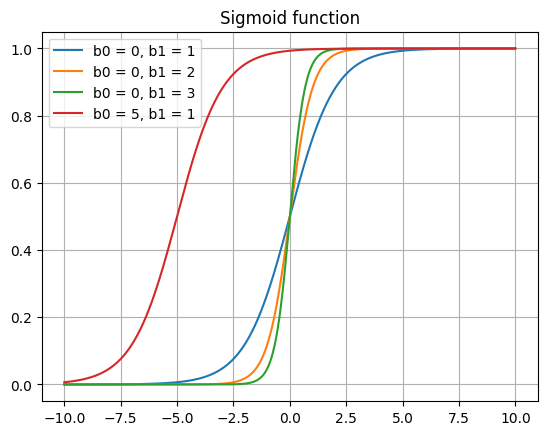

In [2]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    p = 1 / (1 + np.exp(-(b0 + b1 * x)))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.grid()
plt.title('Sigmoid function')
plt.show()

What is controlled by parameters b0, b1?  
<br><br>
Let's now visualize the components of the Loss function:

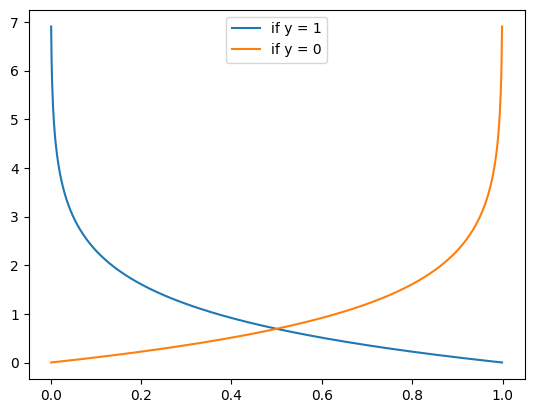

In [4]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

What are the benefits of using logarithms in the loss function?   <br><br>

### Loading Data

In [15]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,7.2250,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,7.2250,C


In [16]:
# removing name column
data = data.drop(['name'], axis = 1)

Что мы знаем о распределении классов по выходу? Какой процент людей выжил? Важно ли иметь одинаковое распределение в тестовом и обучающем наборах? Почему?

#### Задача 1 .

Найдите и выведите пропорцию положительного (выжившего) класса в наборе данных, затем разделите данные на обучающий и тестовый наборы с сохранением этой пропорции. Наконец, в качестве проверки рассчитайте и выведите пропорции в результирующих наборах.

In [17]:
from sklearn.model_selection import train_test_split

# find and print the proportion of positive samples in data
print('% of positive samples in whole data:', sum(data['survived'] == 1) / len(data))

data_label = data.loc[:,"survived"]
data_feature = data.drop(['survived'], axis = 1)
# split data
x_train, x_test, y_train, y_test = train_test_split(data_feature,data_label, test_size=0.2)

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))

% of positive samples in whole data: 0.3819709702062643
% of positive samples in train set: 0.3944603629417383
% of positive samples in test set: 0.3320610687022901


#### Data preprocessing

... is done for you! But you are free to change it if needed.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    print(df[features_name])
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse_output=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
print(x_train)
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train

     pclass     sex   age sibsp parch      fare embarked
0         2    male  25.0     0     0      13.0        S
1         3  female  17.0     4     2     7.925        S
2         3    male  24.0     0     0      7.05        S
3         3  female  47.0     1     0       7.0        S
4         3    male  24.0     0     0    7.8958        C
...     ...     ...   ...   ...   ...       ...      ...
1042      3    male   4.0     4     1    29.125        Q
1043      3  female  24.0     0     0    7.7792        Q
1044      1  female  27.0     1     1  247.5208        C
1045      2    male  19.0     0     0      10.5        S
1046      2    male  23.0     0     0      13.0        S

[1047 rows x 7 columns]
         sex embarked
0       male        S
1     female        S
2       male        S
3     female        S
4       male        C
...      ...      ...
1042    male        Q
1043  female        Q
1044  female        C
1045    male        S
1046    male        S

[1047 rows x 2 columns]
  

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.5,0.311036,0.000,0.000000,0.025374,1.0,0.0,1.0
1,1.0,0.210823,0.500,0.222222,0.015469,0.0,0.0,1.0
2,1.0,0.298509,0.000,0.000000,0.013761,1.0,0.0,1.0
3,1.0,0.586622,0.125,0.000000,0.013663,0.0,0.0,1.0
4,1.0,0.298509,0.000,0.000000,0.015412,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1042,1.0,0.047977,0.500,0.111111,0.056848,1.0,1.0,0.0
1043,1.0,0.298509,0.000,0.000000,0.015184,0.0,1.0,0.0
1044,0.0,0.336089,0.125,0.111111,0.483128,0.0,0.0,0.0
1045,0.5,0.235876,0.000,0.000000,0.020495,1.0,0.0,1.0


### Logistic Regression

Now we are ready to see Logistic Regression in practice.

#### Task 2.
Fit Logistic Regression and output Accuracy, Precision,  Recall and F1 scores on test set.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# caclulate and print metrics
print(f'Testing accuracy = {metrics.accuracy_score(y_test, y_test_pred)}')
print(f'Testing precision = {metrics.precision_score(y_test, y_test_pred)}')
print(f'Testing recall = {metrics.recall_score(y_test, y_test_pred)}')
print(f'Testing F1-score = {metrics.f1_score(y_test, y_test_pred)}')

Testing accuracy = 0.8129770992366412
Testing precision = 0.6938775510204082
Testing recall = 0.7816091954022989
Testing F1-score = 0.7351351351351352


What about Logistic Regression Coefficients? Can we interpret them?

In [32]:
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

('pclass', -1.700593029031348)
('age', -2.058357386815743)
('sibsp', -1.466332125006763)
('parch', -0.10881779036481308)
('fare', 0.49895679015644034)
('sex_male', -2.3126383669960826)
('embarked_Q', -0.41595945199221707)
('embarked_S', -0.7353668710698615)


How can we choose a threshold? Let's try different ones and see their effect on metrics.

#### Task. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

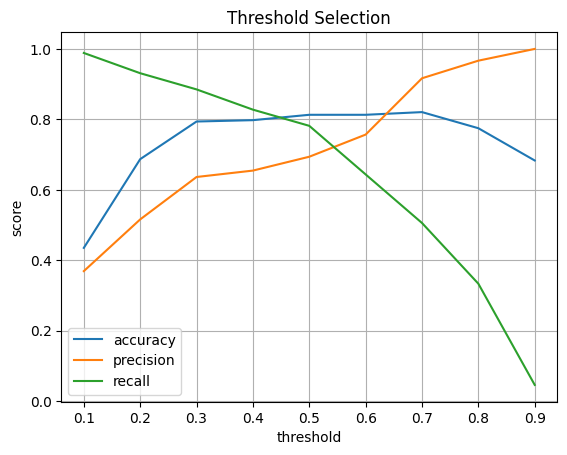

In [33]:
# Thresholds for LR
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Probabilities of each sample from x_test
pred_proba = clf.predict_proba(x_test)

# Accuracy, precision, recall
results = [[],[],[]]
for i in thresholds:
    # Write your code here: if the element from pred_proba > threshold,
    # add 1 to y_test_pred_thr, otherwise add 0
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    # Compare y_test_pred_thr with y_test by metrics and add them to results
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')
plt.plot(thresholds, results[1], label = 'precision')
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

### Confusion matrix

1. Why one may need confusion matrix?
2. What new information does it show?

<table><tr><td><img src='https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png'></td></tr></table>

<img align='center' src='https://www.researchgate.net/profile/Emanuele_Principi/publication/324226324/figure/fig2/AS:612091408941056@1522945372985/Normalized-confusion-matrix-of-best-performing-models-on-devel-subset-a-SVM.png' style='width: 350px;'>


In [34]:
from sklearn.metrics import confusion_matrix

titanic_true_labels = np.array(y_test)
titanic_pred_labels = y_test_pred

print('Confusion Matrix for Titanic:\n', confusion_matrix(titanic_true_labels, titanic_pred_labels), '\n')

Confusion Matrix for Titanic:
 [[145  30]
 [ 19  68]] 



In seaborn this matrix is:

[Text(0, 0.5, 'Not Survived'), Text(0, 1.5, 'Survived')]

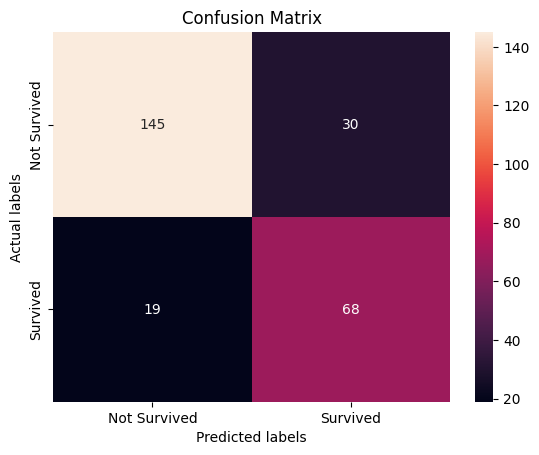

In [35]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(titanic_true_labels, titanic_pred_labels), annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

### <center> Gradient Descent: Losgistic regression with Numpy </center>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from IPython.display import clear_output

### Generate dataset

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

### Visualize the data

In [ ]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.show()

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(x):
    # return the sigmoid
    return 1/ (1 + np.exp(-x))

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In vector form:
$$ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} \textbf{X}^T * (h_{\theta}(\textbf{X}) - \textbf{y}) $$

where **X** - m by j input matrix, **y** - m by 1 target vector, * - [dot multiplication](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

#### Task 4.

Complete the code to compute the predicted label, error, and gradient

In [ ]:
def compute_cost(theta, x, y):
    m = len(y)
    # aka h_theta(x^i)
    y_pred = sigmoid(np.dot(x , theta))
    # The part of J(theta) under the sum
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    # J(theta)
    cost = -1 / m * sum(error)
    # Compute in a vector form
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient # return the total error and the gradient

In [ ]:
### Plot the data with decision boundary
def plot_data_with_decision(data, labels, theta):
    colors = {0:"red", 1:'blue'}
    label_values = [0, 1]

    x_boundary = np.array([np.min(data[:, 1]), np.max(data[:, 1])])
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

    for i in label_values:
        idx = np.where(labels == i)
        plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
    plt.plot(x_boundary, y_boundary)
    plt.xlim([-2, 6])
    plt.show()

### Initialize the parameters of the hypothesis

In [ ]:
n_feature = data.shape[1]
n_samples = data.shape[0]

X = np.append(np.ones((n_samples, 1)), data, axis=1) #include intercept
y = labels.reshape(n_samples, 1)

theta = np.random.randn(n_feature+1).reshape(n_feature+1, 1) # initialize the weights (parameters)

print(f"Initial values of theta : {theta}")
cost, gradient = compute_cost(theta, X, y)
print(f"Initial gradient : {gradient}\nInitial cost {cost}")

plot_data_with_decision(data,labels, theta)

### Apply gradient descent to minimize the loss function

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
costs = []
iterations = 300
lr = 0.01 # the learning rate
for i in range(iterations):
    cost, gradient = compute_cost(theta, X, y)
    theta -= (lr * gradient) # simultaneously update the parameters with thier respective gradients
    costs.append(cost)

### Plotting the Convergence of $J(\theta)$
Plot $J(\theta)$ against the number of iterations of gradient descent:

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")

### Plot the final decision boundary

In [ ]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.plot(x_boundary, y_boundary)
plt.show()

In [ ]:
def predict(theta, X):
    results = X.dot(theta)
    return results > 0.5

print(f"Accuracy: {metrics.accuracy_score(predict(theta, X), y)}")

### Further reading

Classification for more than two classes may be solved by One-vs-Rest or One-vs-One strategies. [link](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)